In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Relu(x):
  x = np.maximum(np.zeros(np.shape(x)), x)
  return x

def Relu_Prime(x):
  y = np.array([])
  for j in range(np.shape(x)[0]):
    z = np.array([])
    for i in range(np.shape(x)[1]):
      if x[j][i] > 0:
        z = np.hstack((z, 1))
      else:
        z = np.hstack((z, 0))
    y = np.concatenate((y, z), axis=0)
  y = np.reshape(y, np.shape(x))
  return y

def Huber(d):
  global e
  e = np.absolute(e)
  y = np.array([])

  for i in range(np.size(e)):
    if e[i] <= d:
      z = 0.5 * e[i]**2
    else:
      z = d*(-0.5*d + e[i])

    y = np.hstack((y, z))
  return y

def Huber_Prime(d):
  global e, W, Z, A, n_l
  e_abs = np.absolute(e)
  D = []
  mean = np.array([])
  #print(np.shape(mean))
  for j in range(np.size(e)):
    dJdW = []
    delta = []
    for i in range(n_l):
      pos = n_l-(i+1)

      #calculate delta values
      if i == 0:
        delta.append(np.multiply((-e[j]), Relu_Prime(Z[pos])))
      else:
        delta.append(np.multiply(np.dot(delta[i-1], W[pos+1].T), Relu_Prime(Z[pos])))

      #calculate dJdW values
      if e_abs[j] <= d:
        dJdW.append(np.dot(A[pos].T, delta[i]))
      else:
        dJdW.append(np.multiply((d/e_abs[i]), np.dot(A[pos].T, delta[i])))

    D.append(dJdW)
  dJdW = Mean(D)
  return dJdW

def Mean(u):
  U = []
  if len(u) == 1:
    U = u
  else:
    for b in range(len(u[0])):
      comp = np.array([])
      for c in range(np.shape(u[0][b])[0]):
        temp = np.zeros((len(u), np.shape(u[0][b])[1]))
        for a in range(len(u)):
          temp[a] = u[a][b][c]
        temp = np.sum(temp, axis=0)
        for d in range(len(temp)):
          temp[d] = temp[d]/len(u)
        comp = np.concatenate((comp, temp), axis=0)
      comp = np.reshape(comp, np.shape(u[0][b]))
      U.append(comp)
  return U

In [ ]:
#-------EDITABLE VALUES-------#
XT = np.array([[0,0,1],
              [1,1,1],
              [1,0,1],
              [0,1,1],
              [0,0,0],
              [1,1,0],
              [1,0,0],
              [0,1,0]])

YT = np.array([[0,1,1,0,0,1,1,0]]).T

nodes_per_layer = [4, 4, 1]

lr = 0.01
batch_size = 2
itterations = 15

#-----------------------------#
HM = np.array([])
n_l = len(nodes_per_layer)
W = [0.1 * np.random.randn(X.shape[1], nodes_per_layer[0])]

for i in range(n_l-1):
  W.append(0.1 * np.random.randn(nodes_per_layer[i], nodes_per_layer[i+1]))
for j in range(itterations):
  row_i = np.random.choice(XT.shape[0], XT.shape[0], replace=False)
  XT = XT[row_i, :]
  YT = YT[row_i, :]
  HT = np.array([])
  for s in range(0, XT.shape[0], batch_size):
    X = XT[s:s+batch_size]
    Y = YT[s:s+batch_size]

    A = [X]
    Z = []

    for i in range(n_l):
      Z.append(np.dot(A[i], W[i]))
      A.append(Relu(Z[i]))

    yHat = A[n_l]
    e = Y - yHat
    HT = np.append(HT, e.flatten())

    cost = Huber(1)
    dJdW = Huber_Prime(1)

    for w in range(n_l):
      W[(-w-1)] -= lr*dJdW[w]
  HM = np.append(HM, [np.mean(HT)])

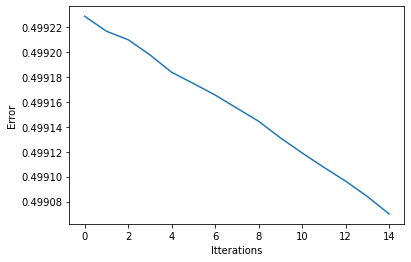

In [ ]:
plt.plot(HM)
plt.xlabel('Itterations')
plt.ylabel('Error')
plt.show()